# **Task 3: Data Cleansing**

### **Introduction**
This task presents a analysis of transactional retail data from DigiCO, an online electronics store. The dataset, which captures details of customer transactions, warehouse operations, and product orders, serves as the foundation for this analysis.

A key challenge in working with this dataset is addressing data quality issues. Due to an unexpected scenario, the dataset contains various errors, missing values, and outliers that must be handled before any meaningful analysis can proceed. Thus, the primary focus of this project is to apply data cleaning techniques as part of the data wrangling process.

Divide this task into 3 parts for processing:

**Part 1: Dirty data**

**Part 2: Missing data**

**Part 3: Outliers data**


# **Part 1. Dirty data**

**Introduction:**

The first dataset, dirty_data.csv, contains inconsistencies and errors such as incorrect values, misaligned data types, or erroneous entries. Using both graphical and non-graphical Exploratory Data Analysis (EDA) methods, we detect these issues and apply appropriate fixes to ensure the integrity of the data.

**Content:**

**1.** Data preprocessing

**2.** Season and Date

**3.** Order_price  

**4.** Order_total

**5.** Customer_lat, customer_lon

**6.** Nearest_warehouse and distance_to_nearest_warehouse

**7.** is_happy_customer

**8.** Linear models depending on the season


# 1. Data preprocessing

**Step 1**: Import packages and dataset

**Step 2**: Check missing values and data type

**Step 3**: Check the distribution characteristics of the data

In [2]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
# import dirty_data dataset
df = pd.read_csv('/Original_data/Dirty_data.csv', encoding='utf-8')
df.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD094145,ID4315827363,2019-01-17,Bakers,"[('Universe Note', 2), ('Alcon 10', 1)]",15850,91.60,-37.811763,145.000412,5,15149.10,Summer,True,0.4962,love being able to listen to music easily. sti...,True
1,ORD317704,ID0319860976,2019-07-14,Bakers,"[('Toshika 750', 1), ('Olivia x460', 1), ('iSt...",5845,66.86,-37.800457,144.997541,25,4450.61,Winter,False,1.0811,NaN,True
2,ORD399913,ID0628175729,2019-08-18,Thompson,"[('Olivia x460', 2), ('Universe Note', 2)]",9350,46.58,-37.812776,144.948362,25,7059.08,Winter,False,1.3951,no cell signal. phone was a total dud. i could...,False
3,ORD183097,ID3543026234,2019-07-04,Thompson,"[('Thunder line', 1), ('Toshika 750', 2), ('Un...",14270,74.94,-37.813351,144.951083,15,12204.44,Winter,False,0.3610,nice phone bought it because 2 months ago i bo...,True
4,ORD179645,ID3967630078,2019-06-25,Thompson,"[('Universe Note', 2), ('iStream', 1), ('Alcon...",24950,77.40,-37.817840,144.952721,5,23779.90,Winter,True,0.7601,great phone! great phone! takes beautiful pict...,False


**Step 2**: Check missing values and data type

In [4]:
df.info() # there's one missing value in lastest customer review

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              500 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    500 non-null    int64  
 6   delivery_charges               500 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    500 non-null    float64
 11  season                         500 non-null    object 
 12  is_expedited_delivery          500 non-null    boo

**Step 3**: Check the distribution characteristics of the data

In [5]:
df.describe()

,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,distance_to_nearest_warehouse
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,13173.750000,77.390900,-27.942497,135.097948,10.550000,12029.646980,1.133216
std,8091.926602,15.201484,41.351590,41.352400,8.383798,7728.765325,0.690163
min,580.000000,46.580000,-37.832478,-37.826939,0.000000,618.880000,0.065600
25%,7262.500000,66.200000,-37.818831,144.949698,5.000000,6339.630000,0.744525
50%,11260.000000,75.840000,-37.812001,144.963334,10.000000,10315.280000,1.056350
75%,18076.250000,84.262500,-37.804218,144.982280,15.000000,16178.087500,1.459200
max,43610.000000,166.130000,145.014204,145.016298,25.000000,43690.360000,12.027300


Some values may have anomalies, for example longest distance to nearest warehouse is 12km, which is much higher than average. Observed that most expensive delivery charge can be twice higher than average.

In [6]:
df.describe(include='object')

,order_id,customer_id,date,nearest_warehouse,shopping_cart,season,latest_customer_review
count,500,500,500,500,500,500,499
unique,500,493,292,6,461,8,499
top,ORD094145,ID4909776715,2019-01-27,Thompson,"[('Thunder line', 1), ('Candle Inferno', 2)]",Spring,love being able to listen to music easily. sti...
freq,1,2,5,196,3,132,1


## 2. Season and Date

**Issue detecting**: Seasons have inconsistent spellings, for example, summer and Summer.

**Issue detecting**: Different date formats mixed, for example, yyyy-mm-dd, yyyy-dd-mm, dd-mm-yyyy, mm-dd-yyyy.

**Solution**:

**Step 1**: Count unique season values

**Step 2**: Make every season's first letter being capitalized and check the result

**Step 3**: Convert date to the correct format by input

**Step 4**: Check whether wrong date formats are fixed

**Step 5**: Update season after getting correct date format




In [7]:
df['season'].value_counts()

,count
season,
Spring,132
Summer,124
Autumn,114
Winter,111
summer,6
spring,5
winter,4
autumn,4


Result indicates that uppercase and lowercase letters are inconsistent.

**Step 2**: Make every season's first letter being capitalized and check the result

In [8]:
df['season'] = df['season'].str.capitalize()
df['season'].value_counts()

,count
season,
Spring,137
Summer,130
Autumn,118
Winter,115


Now letters are consistent and we get those counts. Create the define_season function to define seasons corresponding to different months

In [9]:
def define_season(month):
  if month in [12, 1, 2]:
    return 'Summer'
  if month in [3, 4, 5]:
    return 'Autumn'
  if month in [6, 7, 8]:
    return 'Winter'
  if month in [9, 10, 11]:
    return 'Spring'

In [10]:
# Observe unique values of date
unique_dates = df['date'].unique()
# Show first 50 unique dates
print(unique_dates[:50])

['2019-01-17' '2019-07-14' '2019-08-18' '2019-07-04' '2019-06-25'
 '2019-04-04' '2019-09-02' '2019-05-20' '2019-28-07' '2019-10-08'
 '2019-11-08' '2019-07-23' '2019-06-10' '2019-11-05' '2019-04-29'
 '2019-06-03' '2019-01-25' '2019-12-09' '2019-02-16' '2019-01-27'
 '2019-02-27' '2019-06-05' '12-01-2019' '2019-01-04' '2019-01-09'
 '2019-06-15' '2019-04-07' '2019-02-13' '2019-10-16' '2019-04-20'
 '2019-12-02' '2019-08-21' '2019-04-19' '2019-09-27' '2019-05-01'
 '2019-01-29' '2019-02-17' '2019-09-07' '2019-11-01' '2019-08-04'
 '2019-08-13' '2019-10-23' '2019-31-01' '2019-09-09' '2019-10-27'
 '2019-10-28' '2019-01-19' '2019-12-29' '2019-12-30' '2019-02-25']


From outputs, it's easy to notify that, for example '2019-28-07', '12-01-2019' are different from 'YYYY-MM-DD' format.

**Step 3**: Convert date to the correct format by input

In [11]:
def convert_date(date, provided_season):
    date_parts = re.split(r'[-/]', date)

    # Ensure date_parts have exactly 3 components
    if len(date_parts) != 3:
        return pd.NaT

    # Check if year is at the beginning or end and assign parts accordingly
    if len(date_parts[0]) == 4:  # YYYY-DD-MM or YYYY-MM-DD, default is YYYY-MM-DD
        year = int(date_parts[0])
        month = int(date_parts[1])
        day = int(date_parts[2])

    elif len(date_parts[2]) == 4:  # DD-MM-YYYY or MM-DD-YYYY, default is DD-MM-YYYY
        year = int(date_parts[2])
        month = int(date_parts[1])
        day = int(date_parts[0])
    else:
        return pd.NaT

    # If month is greater than 12, it's actually a day
    if month > 12:
        month, day = day, month

    # Try creating a date object
    try:
        return pd.to_datetime(f'{year}-{month}-{day}', format='%Y-%m-%d', errors='coerce')
    except ValueError:
        return pd.NaT  # Return NaT if the date conversion fails

**Step 4**: Check whether wrong date formats are fixed

In [12]:
# Convert all dates to the correct format
df['date'] = df.apply(lambda row: convert_date(row['date'], row['season']), axis=1)
# Extract month from date and store unique values to unique dates
unique_dates = df['date'].dt.strftime('%Y-%m-%d').unique()
# Show first 50 unique dates
print(unique_dates[:50])

['2019-01-17' '2019-07-14' '2019-08-18' '2019-07-04' '2019-06-25'
 '2019-04-04' '2019-09-02' '2019-05-20' '2019-07-28' '2019-10-08'
 '2019-11-08' '2019-07-23' '2019-06-10' '2019-11-05' '2019-04-29'
 '2019-06-03' '2019-01-25' '2019-12-09' '2019-02-16' '2019-01-27'
 '2019-02-27' '2019-06-05' '2019-01-12' '2019-01-04' '2019-01-09'
 '2019-06-15' '2019-04-07' '2019-02-13' '2019-10-16' '2019-04-20'
 '2019-12-02' '2019-08-21' '2019-04-19' '2019-09-27' '2019-05-01'
 '2019-01-29' '2019-02-17' '2019-09-07' '2019-11-01' '2019-08-04'
 '2019-08-13' '2019-10-23' '2019-01-31' '2019-09-09' '2019-10-27'
 '2019-10-28' '2019-01-19' '2019-12-29' '2019-12-30' '2019-02-25']


After observing, can see that all wrong formats are fixed.

**Step 5**: Update season after getting correct date format

In [13]:
# Extract month from date column and apply in the following function, saving in a new column called 'new_season'
df['new_season'] = df['date'].dt.month.apply(define_season)
df['new_season'].value_counts()

,count
new_season,
Spring,137
Summer,123
Autumn,122
Winter,118


Compare with 'season' column, some counts are different. For example, 130 counts of 'Summer' in 'season', but 124 in 'new_season'. Mistakes are detected.

In [14]:
# Show all wrong seasons which will be re-defined
df_different_seasons = df[df['season'] != df['new_season']]
df_different_seasons[['date', 'season', 'new_season']]

,date,season,new_season
13,2019-06-10,Summer,Winter
25,2019-06-25,Autumn,Winter
41,2019-11-01,Summer,Spring
75,2019-03-01,Spring,Autumn
96,2019-08-04,Autumn,Winter
148,2019-03-28,Summer,Autumn
180,2019-10-19,Summer,Spring
187,2019-08-29,Spring,Winter
213,2019-03-14,Winter,Autumn
219,2019-04-04,Winter,Autumn


In [15]:
# Update 'season' only where it is different from 'new_season'
df.loc[df['season'] != df['new_season'], 'season'] = df['date'].dt.month.apply(define_season)
# Drop 'new_season' column
df.drop('new_season', axis=1, inplace=True)
# Show first 5 rows
df.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD094145,ID4315827363,2019-01-17,Bakers,"[('Universe Note', 2), ('Alcon 10', 1)]",15850,91.60,-37.811763,145.000412,5,15149.10,Summer,True,0.4962,love being able to listen to music easily. sti...,True
1,ORD317704,ID0319860976,2019-07-14,Bakers,"[('Toshika 750', 1), ('Olivia x460', 1), ('iSt...",5845,66.86,-37.800457,144.997541,25,4450.61,Winter,False,1.0811,NaN,True
2,ORD399913,ID0628175729,2019-08-18,Thompson,"[('Olivia x460', 2), ('Universe Note', 2)]",9350,46.58,-37.812776,144.948362,25,7059.08,Winter,False,1.3951,no cell signal. phone was a total dud. i could...,False
3,ORD183097,ID3543026234,2019-07-04,Thompson,"[('Thunder line', 1), ('Toshika 750', 2), ('Un...",14270,74.94,-37.813351,144.951083,15,12204.44,Winter,False,0.3610,nice phone bought it because 2 months ago i bo...,True
4,ORD179645,ID3967630078,2019-06-25,Thompson,"[('Universe Note', 2), ('iStream', 1), ('Alcon...",24950,77.40,-37.817840,144.952721,5,23779.90,Winter,True,0.7601,great phone! great phone! takes beautiful pict...,False


## 3. Shopping_cart & Order_price: check whether there is any calculation error.

**Issue detecting:** some items in shopping cart have errors, because the order price is not match base on the items & quantity in shopping cart.

**Issue detecting:** some rows of order price have calculation error.

**Solution:**

**Step 1:** Get the unit price of each item from missing_data

**Step 2:** Check the order_price is correct or not

**Step 3:** Check the combination of items and quantity in shopping cart can match or not.

**Step 4:** Replace the wrong item with correct item in shopping cart.

**Step 5:** For those no match is found in the shopping cart, replace the incorrect order_price with the correct order price.



In order to check the order_price, we have to use numpy.linalg(least squares solver) package to get the unit price of each item by following steps:

**Step 1-1:** converts the shopping_cart column from a string to actual lists of tuples

**Step 1-2:** extract unique items

**Step 1-3:** create an quantity matrix that each row corresponds to an order, and each column corresponds to the quantity of a unique item.

**Step 1-4:** set up the equation

**Step 1-5:** using linalg.lstsq() to solve equation




**Step 1:** Get the unit price of each item from missing_data

**Step 1-1:** converts the shopping_cart column from a string to actual lists of tuples using ast.literal_eval().

In [16]:
df_miss = pd.read_csv('/Original_data/Missing_data.csv', encoding='utf-8')

df_miss_clean = df_miss.dropna(subset=['order_price'])

In [17]:
import ast
# analyze the shopping_cart column and extract unique items
df_miss_clean['shopping_cart'] = df_miss_clean['shopping_cart'].apply(ast.literal_eval)

<ipython-input-17-e1e1a945a716>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_miss_clean['shopping_cart'] = df_miss_clean['shopping_cart'].apply(ast.literal_eval)


**Step 1-2:** extract unique items, a set of all unique items appearing all orders is generated. This will be used to create the columns of the quantity matrix.

In [18]:
items = set(item for cart in df_miss_clean['shopping_cart'] for item, qty in cart)
items

{'Alcon 10',
 'Candle Inferno',
 'Lucent 330S',
 'Olivia x460',
 'Thunder line',
 'Toshika 750',
 'Universe Note',
 'iAssist Line',
 'iStream',
 'pearTV'}

**Step 1-3:** create an quantity matrix that each row corresponds to an order, and each column corresponds to the quantity of a unique item.

In [19]:
qty_matrix = []
for cart in df_miss_clean['shopping_cart']:
  order_vector = []
  # find the quantity of the item in the current cart
  for item in items:
      # if an item is not present in order, the quantity is set to 0.
      quantity = next((qty for i, qty in cart if i == item), 0)
      order_vector.append(quantity)
  qty_matrix.append(order_vector)

**Step 1-4:** set up the equation:

X * unit of item = Y

X = the coefficient matrix used in the linear equation system.

Y = the total price for each order.

In [20]:
X = np.array(qty_matrix)
X

array([[1, 2, 0, ..., 2, 0, 0],
       [0, 0, 1, ..., 0, 2, 0],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 2, 0, ..., 0, 0, 1],
       [2, 0, 0, ..., 0, 2, 0],
       [0, 2, 2, ..., 1, 0, 0]])

In [21]:
Y = df_miss_clean['order_price'].values
Y

array([26670.,  8770., 10985.,  5910.,  6500., 22350.,  9865.,  7360.,
       13350., 26435.,  5550.,  2610., 11260., 22435., 18065., 26230.,
       20650., 41620., 19395., 19855., 21570.,  7050.,  7330., 20355.,
       21890., 12450.,  7860.,  4660., 13520., 15970., 20360., 13210.,
       28765., 31300.,  5610., 14500., 22670., 14150.,  8950.,  3470.,
        8940., 19310., 17910.,  8150., 13270., 10670., 11800., 16720.,
        2600., 14550., 25435., 17910., 21720.,  5905., 13270., 18020.,
        4830.,  7680., 24720., 15260., 15450.,  9870., 10055.,  6900.,
       18050., 15760., 13210., 11810., 16680., 20730.,  5700.,  9500.,
       11130.,  6055.,  7330., 16280., 16370., 11010.,  1660.,  9355.,
       10760., 30360.,  8070.,  6770., 14110., 13640.,  6405., 28250.,
       13210., 17150.,  9950., 16765., 13445., 15070.,  7200.,  8760.,
       15730., 29420.,  3405.,  6495.,  7430., 25435.,  7980.,  4610.,
       41620., 14800.,  6820., 11455., 10655.,  2600., 18330., 24800.,
      

**Step 1-5:** using linalg.lstsq() to solve X * unit of item = Y

In [22]:
unit_price = np.linalg.lstsq(X, Y, rcond=None)[0]

In [23]:
# create a dictionary to map each item to its unit price
item_unit_price = {}
for item, price in zip(items, unit_price):
   item_unit_price[item] = round(price)

item_unit_price

{'Toshika 750': 4320,
 'Alcon 10': 8950,
 'pearTV': 6310,
 'iStream': 150,
 'Candle Inferno': 430,
 'Olivia x460': 1225,
 'Universe Note': 3450,
 'iAssist Line': 2225,
 'Lucent 330S': 1230,
 'Thunder line': 2180}

**Step 2:** Check the order_price is correct or not
After solving the unit price of each item, we have to check the order_price is correct or not


In [24]:
df['shopping_cart'] = df['shopping_cart'].apply(ast.literal_eval)

In [25]:
df['correct_order_price'] = 0

In [26]:
for idx, cart in enumerate(df['shopping_cart']):
    calculated_price = 0
    # For each item in the shopping cart, calculate its contribution to the order price
    for item, qty in cart:
        if item in item_unit_price:
            calculated_price += item_unit_price[item] * qty
    df.at[idx, 'correct_order_price'] = calculated_price

In [27]:
df['price_is_correct'] = np.isclose(df['order_price'], df['correct_order_price'], atol=1)

In [28]:
df['correct_order_price'] = df['correct_order_price'].astype(int)
incorrect_prices = df[df['price_is_correct'] == False]
incorrect_prices[['order_id', 'shopping_cart', 'order_price', 'correct_order_price']]

,order_id,shopping_cart,order_price,correct_order_price
28,ORD418128,"[(Thunder line, 2), (Alcon 10, 2), (Toshika 75...",26840,29030
29,ORD159351,"[(iAssist Line, 2), (iStream, 1), (Universe No...",12370,9280
47,ORD284881,"[(Thunder line, 2), (Candle Inferno, 1)]",2880,4790
49,ORD487185,"[(iStream, 1), (pearTV, 2), (Thunder line, 1),...",20710,15810
60,ORD472108,"[(Toshika 750, 1), (Candle Inferno, 1), (iAssi...",8205,15925
70,ORD353357,"[(Olivia x460, 2), (Thunder line, 2), (Lucent ...",6450,8040
71,ORD129829,"[(iStream, 2), (iAssist Line, 2), (Olivia x460...",13390,7200
72,ORD294680,"[(Alcon 10, 1), (iAssist Line, 1)]",20210,11175
87,ORD116172,"[(Lucent 330S, 2), (Thunder line, 1), (iAssist...",11895,19485
94,ORD309139,"[(Thunder line, 2), (Olivia x460, 1), (Candle ...",9135,9895


**Step 3:** Check the combination of items and quantity in shopping cart can match or not.
Create a function to find the correct combination of items based on quantity and order_price.
Generates all possible permutations of items, keeps the quantities fixed, and calculates the total price for each permutation. If a match is found where the total price equals the order_price, return the corrected cart. If no match is found, return None.

In [29]:
from itertools import permutations

def fix_shopping_cart_item(order_price, quantities, item_unit_price):
    items = list(item_unit_price.keys())

    # generate all permutations of items with the original quantity in shopping cart
    for p in permutations(items, len(quantities)):
        cart = [(p[i], quantities[i]) for i in range(len(quantities))]
        total = sum(item_unit_price[item] * qty for item, qty in cart)

        # if the total can match the order price, return this cart
        if total == order_price:
            return cart

    # if no match is found return None
    return None

**Step 4:** Replace the wrong item with correct item in shopping cart.

**Step 5:** For those no match is found in shoping cart, replace the incorrect order_price with the correct order price that we calculated.


In [30]:
# loop through rows with mismatch prices
for idx, row in df[df['price_is_correct'] == False].iterrows():
    shopping_cart = row['shopping_cart']
    quantities = [qty for item, qty in shopping_cart]  # Extract quantities from current cart
    correct_cart = fix_shopping_cart_item(row['order_price'], quantities, item_unit_price)

    if correct_cart:
        df.at[idx, 'shopping_cart'] = correct_cart
    else:
        # If no correct cart is found, replace the order_price with the correct_order_price we calculated
        df.at[idx, 'order_price'] = row['correct_order_price']

corrected_orders = df[df['price_is_correct'] == False]
corrected_orders[['order_id', 'shopping_cart', 'order_price', 'correct_order_price']]

,order_id,shopping_cart,order_price,correct_order_price
28,ORD418128,"[(Thunder line, 2), (Alcon 10, 2), (Toshika 75...",29030,29030
29,ORD159351,"[(iAssist Line, 2), (Toshika 750, 1), (iStream...",12370,9280
47,ORD284881,"[(Olivia x460, 2), (Candle Inferno, 1)]",2880,4790
49,ORD487185,"[(Universe Note, 1), (pearTV, 2), (Thunder lin...",20710,15810
60,ORD472108,"[(Toshika 750, 1), (Candle Inferno, 1), (iAssi...",8205,15925
70,ORD353357,"[(Candle Inferno, 2), (Thunder line, 2), (Luce...",6450,8040
71,ORD129829,"[(Toshika 750, 2), (iStream, 2), (iAssist Line...",13390,7200
72,ORD294680,"[(Alcon 10, 1), (iAssist Line, 1)]",11175,11175
87,ORD116172,"[(Lucent 330S, 2), (Thunder line, 1), (iAssist...",19485,19485
94,ORD309139,"[(Candle Inferno, 2), (iStream, 1), (Universe ...",9135,9895


In [33]:
df.drop(columns=['price_is_correct', 'correct_order_price'], inplace=True)

In [34]:
df.tail()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
495,ORD199504,ID2442297401,2019-05-03,Thompson,"[(iStream, 2), (Olivia x460, 2), (Lucent 330S,...",9570,65.72,-37.817114,144.953181,25,7243.22,Autumn,False,0.7302,best cell phone ever does everything i what it...,True
496,ORD044385,ID0634784172,2019-05-03,Thompson,"[(Thunder line, 2), (Toshika 750, 2), (Olivia ...",15450,64.07,-37.816005,144.939522,5,14741.57,Autumn,True,0.7603,phone is not unlocked as they claim i bought t...,False
497,ORD219384,ID2358071076,2019-11-27,Bakers,"[(Alcon 10, 2), (Olivia x460, 1)]",19125,105.71,-37.808281,144.980263,0,19230.71,Spring,True,1.5049,i love this phone i love this phone. i purchas...,True
498,ORD225703,ID0576824180,2019-05-30,Nickolson,"[(pearTV, 1), (Candle Inferno, 1), (iAssist Li...",8965,78.89,-37.819691,144.981077,5,8595.64,Autumn,True,1.0209,five stars great phone.,True
499,ORD460658,ID1132014788,2019-05-30,Thompson,"[(Alcon 10, 1), (Candle Inferno, 1), (Lucent 3...",10910,78.54,-37.817090,144.945844,0,10988.54,Autumn,True,0.5033,five stars if you really like watching movies ...,True


## 4. order_total: check whether there is any calculation error.

**Issue detecting:** some rows of order total have calculation error.

**Solution:**

**Step 1:** Creat a new helper column called expect_order_total which calculate the expect order_total

**Step 2:** Check the order_total is correct or not

**Step 3:** Replace the incorrect order_total to correct order_total

we check the order_total is correct or not base on the fomula:

order_total = order_price * (1 - coupon_discount/100) + delivery_charges

In [35]:
df['correct_order_total'] = (df['order_price'] * (1 - df['coupon_discount'] / 100)) + df['delivery_charges']

**Step 2**: Check the order_total is correct or not

list all the oringinal order_total not equl to correct expect_order_total

In [36]:
error_total_rows = df[df['order_total'] != df['correct_order_total']][['order_total', 'correct_order_total']]
error_total_rows

,order_total,correct_order_total
10,27262.41,14171.67
16,37484.25,8349.44
20,5952.15,12700.06
21,618.88,20745.24
49,14337.31,18747.31
79,18582.31,6769.51
84,11357.15,11199.63
94,8494.21,7848.21
100,9055.39,8859.47
105,5300.94,8375.94


In [37]:
df[df['order_total'] != df['correct_order_total']].shape[0]

34

**Step 3**: Replace the incorrect order_total to correct order_total

In [38]:
df.loc[df['order_total'] != df['correct_order_total'], 'order_total'] = df['correct_order_total']
df[df['order_total'] != df['correct_order_total']].shape[0]

0

drop the helper column which is expect_order_total

In [39]:
df = df.drop(columns=['correct_order_total'])

## 5. Customer_lat, customer_lon

**Issue detecting**: Reverse input of values ​​and inconsistent decimal places.

**Solution**:

**Step 1**: Unify the number of decimal places and observe the statistical characteristics of the data

**Step 2**: Identify outliers by boxplots

**Step 3**: Reverse customer_lat and customer_lon if they are outliers.

**Step 1**: Unify the number of decimal places and observe the statistical characteristics of the data

In [40]:
# customer_lat and customer_lon retain 7 decimal places
df['customer_lat'] = round(df['customer_lat'], 7)
df['customer_long'] = round(df['customer_long'], 7)
# Display statistical information
df[['customer_lat', 'customer_long']].describe()

,customer_lat,customer_long
count,500.000000,500.000000
mean,-27.942497,135.097948
std,41.351590,41.352400
min,-37.832478,-37.826939
25%,-37.818831,144.949698
50%,-37.812001,144.963334
75%,-37.804218,144.982280
max,145.014204,145.016298


The median of customer_lat is about -37.8, however maximum value is 145 which is too large. The same for customer_long, minimum value is much smaller than median

**Step 2**: Identify outliers by boxplots.

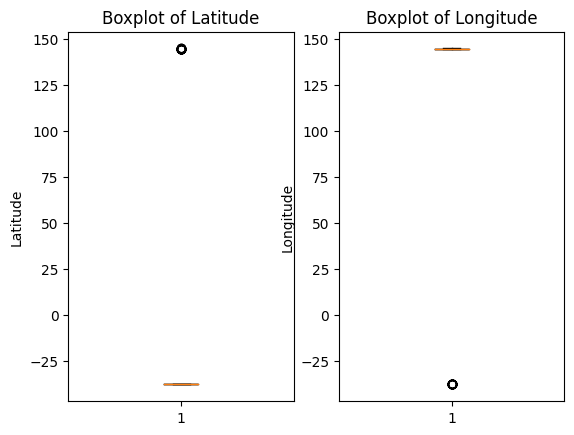

In [41]:
# draw 2 plots to observe customer_lan and customer_long
plt.subplot(1, 2, 1)
plt.boxplot(df['customer_lat'])
plt.title('Boxplot of Latitude')
plt.ylabel('Latitude')

plt.subplot(1, 2, 2)
plt.boxplot(df['customer_long'])
plt.title('Boxplot of Longitude')
plt.ylabel('Longitude')

plt.show()

Plots highlight the values of outliers for both columns are great than 125 and less than -25 separately.

In [42]:
# filter customer_lat which is greater than 125, and the subset stores 'customer_id', 'customer_lat', 'customer_long' columns
lat_subset = df[pd.to_numeric(df['customer_lat']) > 125].loc[:, ['customer_id', 'customer_lat', 'customer_long']]

In [43]:
# filter customer_long which is less than -25, and the subset stores 'customer_id', 'customer_lat', 'customer_long' columns
lon_subset = df[pd.to_numeric(df['customer_long']) < -25].loc[:, ['customer_id', 'customer_lat', 'customer_long']]

In [44]:
# Check whether they are exactly the same
lat_subset.equals(lon_subset)

True

Lat-subset and lon_subset are exactly the same means outliers because of reverse input of values. Correct_cood function takes into account every row's customer_lan and customer_long's values, if they are anomalies, reverse them.

**Step 3**: Reverse customer_lat and customer_lon if they are outliers.

In [45]:
def correct_coord(df_row):
  if pd.to_numeric(df_row['customer_lat']) > 125 and pd.to_numeric(df_row['customer_long']) < -25:
    df_row['customer_lat'], df_row['customer_long'] = df_row['customer_long'], df_row['customer_lat']

  return df_row

In [46]:
df = df.apply(correct_coord, axis=1) # Loop through each row
df[['customer_lat', 'customer_long']].describe()

,customer_lat,customer_long
count,500.000000,500.000000
mean,-37.812175,144.967625
std,0.008554,0.022782
min,-37.832478,144.846336
25%,-37.819080,144.952299
50%,-37.812913,144.963858
75%,-37.805486,144.983101
max,-37.739636,145.016298


Now there are no anomalies. Issue fixed.

## 6. Nearest_warehouse and distance_to_nearest_warehouse

**Issue detecting**: Nearest_warehouse have inconsistent spellings, for example, Bakers and bakers.

**Issue detecting**: Computation of distance_to_nearest_warehouse and nearest_warehouse are incorrect.

**Solution**:

**Step 1**: Count unique Nearest_warehouse values

**Step 2**: Make every warehouse's first letter being capitalized and check the result

**Step 3**: Verify whether the distance between the customer location and the nearest warehouse is accurate.

**Step 4**: Update nearest warehouse's name and distance.


**Step 1**: Count unique Nearest_warehouse values

In [47]:
# Take a look at values counts and find there are different cases
df['nearest_warehouse'].value_counts()

,count
nearest_warehouse,
Thompson,196
Nickolson,163
Bakers,120
thompson,9
nickolson,8
bakers,4


**Step 2**: Make every warehouse's first letter being capitalized and check the result

In [48]:
# Make the first letter capitalized
df['nearest_warehouse'] = df['nearest_warehouse'].str.capitalize()
# Count values again
df['nearest_warehouse'].value_counts()

,count
nearest_warehouse,
Thompson,205
Nickolson,171
Bakers,124


Now it shows there are only 3 warehouses with counts. But nearest_warehouse's name can be incorrect by distance.

**Step 3**: Verify whether the distance between the customer location and the nearest warehouse is accurate.

Create a function haversine to calculate distances between two coordinates.

In [49]:
from math import radians, cos, sin, asin, sqrt

# Calculate distances based on Haversine Distance
def haversine(lon1, lat1, lon2, lat2):
  # convert decimal degrees to radians
  lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

  dlon = lon2 - lon1
  dlat = lat2 - lat1
  a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
  c = 2 * asin(sqrt(a))
  r = 6378
  return round(c * r, 4) # Take 4 decimal places

In [50]:
# Import warehouses dataset and show it
warehouses = pd.read_csv('/Original_data/warehouses.csv')
warehouses

,names,lat,lon
0,Nickolson,-37.818595,144.969551
1,Thompson,-37.812673,144.947069
2,Bakers,-37.809996,144.995232


Create a function locate_nearest_warehouse to get shortest distance and warehouse name

In [51]:
def locate_nearest_warehouse(df_row):
  # Get all distances between customer locations to all 3 warehouses
  distances = warehouses.apply(lambda row: haversine(df_row['customer_long'], df_row['customer_lat'], row['lon'], row['lat']), axis=1)
  # get minimum distance's index
  min_index = distances.idxmin()
  # return minimum distance's warehouse name and distance
  return pd.Series([warehouses.iloc[min_index]['names'], distances[min_index]])

In [52]:
# Add two new columns to store nearest warehouse name and distance
df[['new_nearest_warehouse', 'new_distance']] = df.apply(locate_nearest_warehouse, axis=1)

In [53]:
# Filter rows where either warehouse names or distances are different
df_differences_distance_name = df[
    (df['nearest_warehouse'] != df['new_nearest_warehouse']) |
    (df['distance_to_nearest_warehouse'] != df['new_distance'])
]

# Display the relevant columns for the filtered rows
df_differences_distance_name[['customer_id', 'nearest_warehouse', 'distance_to_nearest_warehouse', 'new_nearest_warehouse', 'new_distance']]

,customer_id,nearest_warehouse,distance_to_nearest_warehouse,new_nearest_warehouse,new_distance
2,ID0628175729,Thompson,1.3951,Thompson,0.1143
30,ID4391708632,Thompson,0.9345,Nickolson,0.9345
66,ID4315827378,Bakers,1.2895,Bakers,1.3291
69,ID3191033048,Thompson,0.8345,Nickolson,0.8345
86,ID0302135273,Nickolson,1.1759,Bakers,1.1759
95,ID6143901733,Bakers,1.9662,Bakers,1.1230
125,ID0245807244,Nickolson,1.8198,Thompson,1.8198
131,ID3945796036,Thompson,2.1776,Thompson,0.8576
157,ID0847530557,Nickolson,1.1759,Nickolson,0.5639
166,ID3945799005,Nickolson,1.8501,Nickolson,0.8858


In [54]:
# Count values of new_nearest warehouse
df['new_nearest_warehouse'].value_counts()

,count
new_nearest_warehouse,
Thompson,206
Nickolson,169
Bakers,125


Compare with counts of nearest warehouse, values are different.

**Step 4**: Update nearest warehouse's name and distance.

In [55]:
# Update only rows where nearest warehouse is incorrect
df.loc[df['nearest_warehouse'] != df['new_nearest_warehouse'], 'nearest_warehouse'] = df['new_nearest_warehouse']

# Update only rows where distance to nearest warehouse is incorrect
df.loc[df['distance_to_nearest_warehouse'] != df['new_distance'], 'distance_to_nearest_warehouse'] = df['new_distance']

# Drop those 2 new columns
df.drop(['new_nearest_warehouse', 'new_distance'], axis=1, inplace=True)
# Show first 5 rows and check accuracy
df.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD094145,ID4315827363,2019-01-17,Bakers,"[(Universe Note, 2), (Alcon 10, 1)]",15850,91.60,-37.811763,145.000412,5,15149.10,Summer,True,0.4962,love being able to listen to music easily. sti...,True
1,ORD317704,ID0319860976,2019-07-14,Bakers,"[(Toshika 750, 1), (Olivia x460, 1), (iStream,...",5845,66.86,-37.800457,144.997541,25,4450.61,Winter,False,1.0811,NaN,True
2,ORD399913,ID0628175729,2019-08-18,Thompson,"[(Olivia x460, 2), (Universe Note, 2)]",9350,46.58,-37.812776,144.948362,25,7059.08,Winter,False,0.1143,no cell signal. phone was a total dud. i could...,False
3,ORD183097,ID3543026234,2019-07-04,Thompson,"[(Thunder line, 1), (Toshika 750, 2), (Univers...",14270,74.94,-37.813351,144.951083,15,12204.44,Winter,False,0.3610,nice phone bought it because 2 months ago i bo...,True
4,ORD179645,ID3967630078,2019-06-25,Thompson,"[(Universe Note, 2), (iStream, 1), (Alcon 10, 2)]",24950,77.40,-37.817840,144.952721,5,23779.90,Winter,True,0.7601,great phone! great phone! takes beautiful pict...,False


## 7. is_happy_customer: To check whether a customer is happy with their last order

**Issue detectinng:** some values of is_happy are not match with the contents of  customer review.

**Solution:**

**Step 1:** Apply the SentimentIntensityAnalyzer to the latest_customer_review and compute whether the sentiment is positive or negative.


**Step 2:** Creat two helper column to apply the sentiment classifier to the
'latest_customer_review' column

**Step 3:** Check the number if the review does not match the value of is_happy_customer

**Step 4:** Replace the incorrect values in 'is_happy_customer' with the computed values

**Step 1**: Apply the SentimentIntensityAnalyzer to the latest_customer_review and compute whether the sentiment is positive or negative.

In [56]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [57]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [58]:
senti_analyzer = SentimentIntensityAnalyzer()

In [59]:
def classify_sentiment(review):
    if pd.isna(review):
        return True  # if there are no reviews still return True
    score = senti_analyzer.polarity_scores(review)
    return score['compound'] >= 0.05

**Step 2**: Creat two helper column to apply the sentiment classifier to the
'latest_customer_review' column

In [60]:
df['actual_is_happy_customer'] = df['latest_customer_review'].apply(classify_sentiment)

In [61]:
df['is_match'] = df['actual_is_happy_customer'] == df['is_happy_customer']

**Step 3**: Check the number if the review does not match the value of is_happy_customer

In [62]:
df['is_match'].value_counts()

,count
is_match,
True,473
False,27


**Step 4**: Replace the incorrect values in 'is_happy_customer' with the computed values

In [63]:
df.loc[df['is_happy_customer'] != df['actual_is_happy_customer'], 'is_happy_customer'] = df['actual_is_happy_customer']

In [64]:
# Drop the helper column
df.drop(columns=['actual_is_happy_customer', 'is_match'], inplace=True)

In [65]:
df.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD094145,ID4315827363,2019-01-17,Bakers,"[(Universe Note, 2), (Alcon 10, 1)]",15850,91.60,-37.811763,145.000412,5,15149.10,Summer,True,0.4962,love being able to listen to music easily. sti...,True
1,ORD317704,ID0319860976,2019-07-14,Bakers,"[(Toshika 750, 1), (Olivia x460, 1), (iStream,...",5845,66.86,-37.800457,144.997541,25,4450.61,Winter,False,1.0811,NaN,True
2,ORD399913,ID0628175729,2019-08-18,Thompson,"[(Olivia x460, 2), (Universe Note, 2)]",9350,46.58,-37.812776,144.948362,25,7059.08,Winter,False,0.1143,no cell signal. phone was a total dud. i could...,False
3,ORD183097,ID3543026234,2019-07-04,Thompson,"[(Thunder line, 1), (Toshika 750, 2), (Univers...",14270,74.94,-37.813351,144.951083,15,12204.44,Winter,False,0.3610,nice phone bought it because 2 months ago i bo...,True
4,ORD179645,ID3967630078,2019-06-25,Thompson,"[(Universe Note, 2), (iStream, 1), (Alcon 10, 2)]",24950,77.40,-37.817840,144.952721,5,23779.90,Winter,True,0.7601,great phone! great phone! takes beautiful pict...,True


## 8. Linear models depending on the season

**Step 1**: Convert boolean type into int for further analysis

**Step 2**: Write a function build_linear_model to fit linear model, return model and r-squared

**Step 3**: Try different combinations of variables, bring different seasons into the function, and find the 5 combinations with the highest r-squared.

**Step 4**: Divide by season and output the combination and value with the highest r-squared

**Step 1**: Convert boolean type into int for further analysis

In [66]:
df2 = df.copy()
# standardize boolean values into int format
df2['is_expedited_delivery'] = df2['is_expedited_delivery'].astype(int)
df2['is_happy_customer'] = df2['is_happy_customer'].astype(int)

**Step 2**: Write a function build_linear_model to fit linear model, return model and r-squared

In [67]:
def build_linear_model(df, season, variables):
  # Filter data by season and ignore missing values of delivery_charges column.
  season_data = df[(df['season'] == season) & df['delivery_charges'].notna()]
  # Define variables and target
  X = season_data[variables]
  y = season_data['delivery_charges']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

  model = LinearRegression()
  model.fit(X_train, y_train)

  # Get r^2 of the model
  r_squared = model.score(X_test, y_test)
  return model, r_squared


**Step 3**: Try different combinations of variables, bring different seasons into the function, and find the 5 combinations with the highest r^2.

In [68]:
# Spring season model
result_spring = []
# Possible variables from dataset
variables = ['distance_to_nearest_warehouse', 'is_expedited_delivery','is_happy_customer', 'order_price', 'coupon_discount', 'order_total']
combinations = []

# Loop over all the possible combinations, and then store each combination in the combinations list.
for i in range(1, len(variables) + 1):
  combinations.extend(itertools.combinations(variables, i))

# Loop over each combination and get R-squared values
for comb in combinations:
  r2 = build_linear_model(df2, 'Spring', list(comb))[1]
  result_spring.append((comb, r2))

# Sort r2 from high to low
sorted_results = sorted(result_spring, key=lambda x: x[1], reverse=True)

# Print top 5 r2 and combinations
for comb, r2 in sorted_results[:5]:
  print(f"R-squared:{r2:.3f}, {comb}")

R-squared:0.803, ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer')
R-squared:0.800, ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'coupon_discount')
R-squared:0.771, ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'order_price', 'coupon_discount', 'order_total')
R-squared:0.766, ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'coupon_discount', 'order_total')
R-squared:0.766, ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'order_price', 'coupon_discount')


In [69]:
# Summer season model
result_summer = []
# Possible variables from dataset
variables = ['distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'order_price', 'coupon_discount']
combinations = []

# Loop over all the possible combinations, and then store each combination in the combinations list.
for i in range(1, len(variables) + 1):
  combinations.extend(itertools.combinations(variables, i))

# Loop over each combination and get R-squared values
for comb in combinations:
  r2 = build_linear_model(df2, 'Summer', list(comb))[1]
  result_summer.append((comb, r2))

# Sort r2 from high to low
sorted_results = sorted(result_summer, key=lambda x: x[1], reverse=True)

# Print top 5 r2 and combinations
for comb, r2 in sorted_results[:5]:
  print(f"R-squared:{r2:.3f}, {comb}")

R-squared:0.799, ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer')
R-squared:0.799, ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'order_price', 'coupon_discount')
R-squared:0.799, ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'coupon_discount')
R-squared:0.799, ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'order_price')
R-squared:0.599, ('distance_to_nearest_warehouse', 'is_happy_customer')


In [70]:
# Autumn season model
result_autumn = []
# Possible variables from dataset
variables = ['distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'order_price', 'coupon_discount']
combinations = []

# Loop over all the possible combinations, and then store each combination in the combinations list.
for i in range(1, len(variables) + 1):
  combinations.extend(itertools.combinations(variables, i))

# Loop over each combination and get R-squared values
for comb in combinations:
  r2 = build_linear_model(df2, 'Autumn', list(comb))[1]
  result_autumn.append((comb, r2))

# Sort r2 from high to low
sorted_results = sorted(result_autumn, key=lambda x: x[1], reverse=True)

# Print top 5 r2 and combinations
for comb, r2 in sorted_results[:5]:
  print(f"R-squared:{r2:.3f}, {comb}")

R-squared:0.825, ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'coupon_discount')
R-squared:0.817, ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer')
R-squared:0.810, ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'order_price', 'coupon_discount')
R-squared:0.799, ('is_expedited_delivery', 'is_happy_customer', 'coupon_discount')
R-squared:0.797, ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'order_price')


In [71]:
# Winter season model
result_winter = []
# Possible variables from dataset
variables = ['distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'order_price', 'coupon_discount']
combinations = []

# Loop over all the possible combinations, and then store each combination in the combinations list.
for i in range(1, len(variables) + 1):
  combinations.extend(itertools.combinations(variables, i))

# Loop over each combination and get R-squared values
for comb in combinations:
  r2 = build_linear_model(df2, 'Winter', list(comb))[1]
  result_winter.append((comb, r2))

# Sort r2 from high to low
sorted_results = sorted(result_winter, key=lambda x: x[1], reverse=True)

# Print top 5 r2 and combinations
for comb, r2 in sorted_results[:5]:
  print(f"R-squared:{r2:.3f}, {comb}")

R-squared:0.762, ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'order_price', 'coupon_discount')
R-squared:0.762, ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'coupon_discount')
R-squared:0.760, ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'order_price')
R-squared:0.760, ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer')
R-squared:0.742, ('is_expedited_delivery', 'is_happy_customer', 'order_price', 'coupon_discount')


**Step 4**: Divide by season and output the combination and value with the highest r-squared

For Spring season, delivery charges are related to 'distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer' which has the highest R-squared 0.803

For Summer season, delivery charges are related to 'distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer',  which has the highest R-squared 0.799

For Autumn season, delivery charges are related to 'distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'coupon_discount' which has the highest R-squared 0.825

For Winter season, delivery charges are related to 'distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer' , 'order_price', 'coupon_discount' which has the highest R-squared 0.763

## Save to csv

In [72]:
df.to_csv('Dirty_data_solution.csv', index=False, encoding='utf-8')

# Part 2. Missing Data
**Introduction:**

The second dataset, missing_data.csv, has missing values that could hinder analysis. To address this, use various imputation methods, including statistical techniques and domain knowledge, to fill in the gaps while maintaining the overall consistency of the dataset.

**Content:**

**2-1:** Data preprocessing

**2-2:** missing values in nearest_warehouse and distance_to_nearest_warehouse

**2-3:** missing values in order_price

**2-4:** missing values in order_total

**2-5:** missing values in is_happy_customer

**2-6:** missing values in delivery_charges


## 2-1. Data preprocessing

**Step 1**: Import packages and dataset

**Step 2**: Check missing values and data type

**Step 3**: Check the distribution characteristics of the data

**Step 1**: Import packages and dataset

In [73]:
# import missing_data dataset
df_mis = pd.read_csv('/Original_data/Missing_data.csv', encoding='utf-8')
# read first 5 rows
df_mis.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD162116,ID0577521512,2019-03-15,Nickolson,"[('iAssist Line', 2), ('Toshika 750', 1), ('Al...",26670.0,79.33,-37.823097,144.973591,10,24082.33,Autumn,True,0.6143,pretty happy with purchase so far !! the one i...,NaN
1,ORD057568,ID0655124685,2019-04-16,Thompson,"[('Lucent 330S', 2), ('pearTV', 1)]",8770.0,77.35,-37.808149,144.942601,15,7531.85,Autumn,True,0.6387,lucent g love this phone!! great for the price...,1.0
2,ORD158151,ID0207085815,2019-07-02,NaN,"[('iAssist Line', 1), ('pearTV', 1), ('Olivia ...",10985.0,82.16,-37.810352,145.015210,15,9419.41,Winter,True,1.7574,good good smartphone...but olivia's android sy...,1.0
3,ORD122129,ID1517123099,2019-11-23,Nickolson,"[('Lucent 330S', 2), ('Universe Note', 1)]",5910.0,76.46,-37.815134,144.975184,10,5395.46,Spring,False,0.6275,nice phone it's was like brand new,1.0
4,ORD442034,ID0702451442,2019-09-20,Thompson,"[('Toshika 750', 1), ('Thunder line', 1)]",6500.0,77.69,-37.804545,144.944190,0,6577.69,Spring,False,0.9396,five stars i absolutely love this phone,1.0


**Step 2**: Check missing values and data type

In [74]:
df_mis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              445 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    485 non-null    float64
 6   delivery_charges               460 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    485 non-null    float64
 11  season                         500 non-null    object 
 12  is_expedited_delivery          500 non-null    boo

There are missing data in 'nearest_warehouse', 'order_price', 'delivery_charges', 'order_total', 'distance_to_nearest_warehouse' and 'is_happy_customer' columns

**Step 3**: Check the distribution characteristics of the data

In [75]:
df_mis.describe()

,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,distance_to_nearest_warehouse,is_happy_customer
count,485.000000,460.000000,500.000000,500.000000,500.000000,485.000000,469.000000,460.000000
mean,14145.721649,76.914652,-37.812142,144.967154,11.050000,12638.185299,1.130209,0.771739
std,8093.287418,14.448881,0.007893,0.022001,8.939089,7317.140061,0.583709,0.420169
min,730.000000,45.000000,-37.861835,144.905716,0.000000,627.370000,0.056600,0.000000
25%,7770.000000,66.657500,-37.818575,144.952363,5.000000,7152.760000,0.733600,1.000000
50%,13210.000000,76.845000,-37.812418,144.964247,10.000000,11343.550000,1.091600,1.000000
75%,19000.000000,83.172500,-37.805468,144.982540,15.000000,17317.980000,1.483400,1.000000
max,43610.000000,147.030000,-37.796464,145.020927,25.000000,41699.510000,6.570000,1.000000


In [76]:
df_mis.describe(include='object')

,order_id,customer_id,date,nearest_warehouse,shopping_cart,season,latest_customer_review
count,500,500,500,445,500,500,500
unique,500,496,279,3,472,4,500
top,ORD162116,ID0457365625,2019-02-15,Thompson,"[('Candle Inferno', 2), ('Olivia x460', 2)]",Summer,pretty happy with purchase so far !! the one i...
freq,1,2,6,189,3,129,1


In [77]:
df_mis.isnull().sum() # Observe the number of missing values by column, and then fill in them one by one.

,0
order_id,0
customer_id,0
date,0
nearest_warehouse,55
shopping_cart,0
order_price,15
delivery_charges,40
customer_lat,0
customer_long,0
coupon_discount,0


## 2-2. Dealing missing values in nearest_warehouse and distance_to_nearest_warehouse columns

**Step 1**: Write a function fill_missing_name_distance to fill missing nearest warehouse names and distance.

**Step 2**: Call the function to fill missing values in these 2 columns.

**Step 3**: Check whether missing values are filled in.

In [78]:
def fill_missing_name_distance(row):
  # Check if either column is missing
  if pd.isnull(row['nearest_warehouse']) or pd.isnull(row['distance_to_nearest_warehouse']):
    nearest_warehouse, distance_to_nearest_warehouse = locate_nearest_warehouse(row)
    return [nearest_warehouse, distance_to_nearest_warehouse]
  else:
    # Return the existing values if not missing
    return row[['nearest_warehouse', 'distance_to_nearest_warehouse']]

If name or distance is missing, call locate_nearest_warehouse method to get outputs, otherwise just keep their original values.

In [79]:
# Fill missing values in those 2 columns
df_mis[['nearest_warehouse', 'distance_to_nearest_warehouse']] = df_mis.apply(fill_missing_name_distance, axis=1, result_type='expand')

In [80]:
df_mis[['nearest_warehouse', 'distance_to_nearest_warehouse']].isnull().sum()

,0
nearest_warehouse,0
distance_to_nearest_warehouse,0


The result shows that there's no missing value left in those two columns.

## 2-3. Dealing missing values in order_price

**Step 1:** Convert 'shopping_cart' column from string to list.

**Step 2:** Iterate over rows with missing 'order_price' values.

**Step 3:** For each row with a missing order_price, loops through the shopping_cart items to get order_price.

**Step 4:** Update missing 'order_price' with predicted values.




**Step 1:** Convert 'shopping_cart' column from string to list.

In [81]:
df_mis['shopping_cart'] = df_mis['shopping_cart'].apply(ast.literal_eval)

**Step 2:** Iterate over rows with missing 'order_price' values.

**Step 3:** For each row with a missing order_price, loops through the shopping_cart items to get order_price.

**Step 4:** Update missing 'order_price' with predicted values.

In [82]:
# fill missing order_price values
for index, row in df_mis.iterrows():
  if pd.isnull(row['order_price']):
    # initialize the predicted price
    predicted_price = 0

    # loop the items in shopping_cart
    for item, qty in row['shopping_cart']:
        if item in item_unit_price:
            # calculate the price
            predicted_price += item_unit_price[item] * qty

    # update the missing order_price
    df_mis.at[index, 'order_price'] = predicted_price

In [83]:
df_mis['order_price'] = df_mis['order_price'].round(2)

In [84]:
df_mis['order_price'].isnull().sum()

0

### 2-4. Dealing missing values in order_total

**Step 1:** Iterate over rows with missing 'order_total' values.

**Step 2:** Ensure that 'order_price', 'coupon_discount', and 'delivery_charges' are available.

**Step 3:** Calculate 'order_total'.

**Step 4:** Update missing 'order_total' with the calculated value.



In [85]:
# fill missing order_total values
for index, row in df_mis.iterrows():
  if pd.isnull(row['order_total']):

    # make sure order_price, coupon_discount, and delivery_charges all have value
    if pd.notnull(row['order_price']) and pd.notnull(row['coupon_discount']) and pd.notnull(row['delivery_charges']):

        # calculate the order_total
        order_total = row['order_price'] * (1 - row['coupon_discount'] / 100) + row['delivery_charges']

        # update the missing order_total
        df_mis.at[index, 'order_total'] = round(order_total, 2)

In [86]:
df_mis['order_total'] = df_mis['order_total'].round(2)

In [87]:
df_mis['order_total'].isnull().sum()

0

## 2-5. Dealing missing values in is_happy_customer

**Step 1:** Iterate over rows with missing 'is_happy_customer' values

**Step 2:** Perform sentiment analysis on 'latest_customer_review'.

**Step 3:** Update 'is_happy_customer' based on sentiment analysis.


In [88]:
# fill missing values of is_happy_customer
for index, row in df_mis.iterrows():
    # if is_happy_customer is missing, apply sentiment analysis
    if pd.isnull(row['is_happy_customer']):
        # check sentiment based on the latest customer review
        sentiment_result = classify_sentiment(row['latest_customer_review'])

        # update the missing value of is_happy_customer
        df_mis.at[index, 'is_happy_customer'] = sentiment_result

In [89]:
df_mis['is_happy_customer'] = df_mis['is_happy_customer'].astype(int)
df_mis['is_happy_customer'].isnull().sum()

0

## 2-6. Dealing missing values in delivery_charges

**Step 1**: View delivery charges' statistics

**Step 2**: Using three methods to fill missing values (Mean Method, Deletion Method and Linear Regression Method)

**Step 3**: Compare three methods and get the conclusion that Linear Regression Method is the best

**Step 1**: View delivery charges' statistics

In [90]:
# There are 40 missing values in this column
df_mis.delivery_charges.describe()

,delivery_charges
count,460.000000
mean,76.914652
std,14.448881
min,45.000000
25%,66.657500
50%,76.845000
75%,83.172500
max,147.030000


**Step 2**: Using three methods to fill missing values (Mean Method, Deletion Method and Linear Regression Method)

### Method 1: Use season mean to fill NA

In [91]:
df_mis_mean = df_mis.copy()
# Fill missing values by different seasons' average delivery charge
df_mis_mean["delivery_charges"].fillna(df_mis_mean.groupby("season")["delivery_charges"].transform("mean"), inplace=True)
df_mis_mean.delivery_charges.describe()

,delivery_charges
count,500.000000
mean,76.878088
std,14.035640
min,45.000000
25%,67.445000
50%,76.660000
75%,83.140000
max,147.030000


### Method 2: Deletion Method

In [92]:
df_mis_drop = df_mis.copy()
# Drop all missing values
df_mis_drop.dropna(subset=['delivery_charges'],axis=0,inplace=True)

In [93]:
df_mis_drop.delivery_charges.describe()

,delivery_charges
count,460.000000
mean,76.914652
std,14.448881
min,45.000000
25%,66.657500
50%,76.845000
75%,83.172500
max,147.030000


### Method 3: Linear Regression

**Step 1**: Try different combinations of variables, bring different seasons into the function, and find the 5 combinations with the highest r^2.

**Step 2**: Substitute the best combination to get the model.

**Step 3**: Demonstrate the season with missing values and assign the predicted values directly to the missing positions.

**Step 4**: Repeat first 3 steps for 4 seasons.

In [94]:
# Spring season model
result_spring = []
# Possible variables from dataset
variables = ['distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'order_price', 'coupon_discount']
combinations = []

# Loop over all the possible combinations, and then store each combination in the combinations list.
for i in range(1, len(variables) + 1):
  combinations.extend(itertools.combinations(variables, i))

# Loop over each combination and get R-squared values
for comb in combinations:
  r2 = build_linear_model(df_mis_drop, 'Spring', list(comb))[1]
  result_spring.append((comb, r2))

# Sort r2 from high to low
sorted_results = sorted(result_spring, key=lambda x: x[1], reverse=True)
# Get the best combination
best_combination = sorted_results[0][0]

# Print top 5 r2 and combinations
for comb, r2 in sorted_results[:5]:
  print(f"R-squared:{r2:.3f}, {comb}")

R-squared:0.997, ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer')
R-squared:0.997, ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'order_price')
R-squared:0.997, ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'coupon_discount')
R-squared:0.997, ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'order_price', 'coupon_discount')
R-squared:0.879, ('is_expedited_delivery', 'is_happy_customer')


For Spring season, delivery charges are related to 'distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer' which has the highest R-squared 0.997

In [95]:
# Substitute the best combination to get the model
model = build_linear_model(df_mis_drop, 'Spring', list(best_combination))[0]

In [96]:
# Show the season with missing values in 'delivery_charges'
spring_mis = df_mis[(df_mis['season'] == 'Spring') & df_mis['delivery_charges'].isnull()]
spring_mis[['season', 'delivery_charges']]

,season,delivery_charges
11,Spring,NaN
20,Spring,NaN
23,Spring,NaN
91,Spring,NaN
157,Spring,NaN
253,Spring,NaN
436,Spring,NaN
446,Spring,NaN
492,Spring,NaN


In [97]:
if spring_mis['delivery_charges'].isnull().any():
  # Predict missing delivery charges for spring
  predicted_charges_spring = model.predict(spring_mis[list(best_combination)])

  # Assign the predicted values directly to the missing positions
  df_mis.loc[spring_mis.index, 'delivery_charges'] = np.round(predicted_charges_spring, 2)

In [98]:
# Summer season model
result_summer = []
# Possible variables from dataset
variables = ['distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'order_price', 'coupon_discount']
combinations = []

# Loop over all the possible combinations, and then store each combination in the combinations list.
for i in range(1, len(variables) + 1):
  combinations.extend(itertools.combinations(variables, i))

# Loop over each combination and get R-squared values
for comb in combinations:
  r2 = build_linear_model(df_mis_drop, 'Summer', list(comb))[1]
  result_summer.append((comb, r2))

# Sort r2 from high to low
sorted_results = sorted(result_summer, key=lambda x: x[1], reverse=True)
# Get the best combination
best_combination = sorted_results[0][0]

# Print top 5 r2 and combinations
for comb, r2 in sorted_results[:5]:
  print(f"R-squared:{r2:.3f}, {comb}")

R-squared:0.995, ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'order_price', 'coupon_discount')
R-squared:0.995, ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'order_price')
R-squared:0.995, ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'coupon_discount')
R-squared:0.995, ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer')
R-squared:0.785, ('is_expedited_delivery', 'is_happy_customer')


For Summer season, delivery charges are related to 'distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'order_price', 'coupon_discount' which has the highest R-squared 0.995

In [99]:
# Substitute the best combination to get the model
model = build_linear_model(df_mis_drop, 'Summer', list(best_combination))[0]

In [100]:
# Show the season with missing values in 'delivery_charges'
summer_mis = df_mis[(df_mis['season'] == 'Summer') & df_mis['delivery_charges'].isnull()]
summer_mis[['season', 'delivery_charges']]

,season,delivery_charges
26,Summer,NaN
30,Summer,NaN
34,Summer,NaN
131,Summer,NaN
150,Summer,NaN
216,Summer,NaN
305,Summer,NaN
341,Summer,NaN
414,Summer,NaN
456,Summer,NaN


In [101]:
if summer_mis['delivery_charges'].isnull().any():
  # Predict missing delivery charges for summer
  predicted_charges_summer = model.predict(summer_mis[list(best_combination)])

  # Assign the predicted values directly to the missing positions
  df_mis.loc[summer_mis.index, 'delivery_charges'] = np.round(predicted_charges_summer, 2)

In [102]:
# Autumn season model
result_autumn = []
# Possible variables from dataset
variables = ['distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'order_price', 'coupon_discount']
combinations = []

# Loop over all the possible combinations, and then store each combination in the combinations list.
for i in range(1, len(variables) + 1):
  combinations.extend(itertools.combinations(variables, i))

# Loop over each combination and get R-squared values
for comb in combinations:
  r2 = build_linear_model(df_mis_drop, 'Autumn', list(comb))[1]
  result_autumn.append((comb, r2))

# Sort r2 from high to low
sorted_results = sorted(result_autumn, key=lambda x: x[1], reverse=True)
# Get the best combination
best_combination = sorted_results[0][0]

# Print top 5 r2 and combinations
for comb, r2 in sorted_results[:5]:
  print(f"R-squared:{r2:.3f}, {comb}")

R-squared:0.989, ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'coupon_discount')
R-squared:0.989, ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'order_price', 'coupon_discount')
R-squared:0.989, ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer')
R-squared:0.989, ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'order_price')
R-squared:0.912, ('is_expedited_delivery', 'is_happy_customer', 'order_price', 'coupon_discount')


For Autumn season, delivery charges are related to 'distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'coupon_discount' which has the highest R-squared 0.989

In [103]:
# Substitute the best combination to get the model
model = build_linear_model(df_mis_drop, 'Autumn', list(best_combination))[0]

In [104]:
# Show the season with missing values in 'delivery_charges'
autumn_mis = df_mis[(df_mis['season'] == 'Autumn') & df_mis['delivery_charges'].isnull()]
autumn_mis[['season', 'delivery_charges']]

,season,delivery_charges
65,Autumn,NaN
97,Autumn,NaN
115,Autumn,NaN
122,Autumn,NaN
136,Autumn,NaN
156,Autumn,NaN
210,Autumn,NaN
318,Autumn,NaN
371,Autumn,NaN
491,Autumn,NaN


In [105]:
if autumn_mis['delivery_charges'].isnull().any():
  # Predict missing delivery charges for autumn
  predicted_charges_autumn = model.predict(autumn_mis[list(best_combination)])

  # Assign the predicted values directly to the missing positions
  df_mis.loc[autumn_mis.index, 'delivery_charges'] = np.round(predicted_charges_autumn, 2)

In [106]:
# Winter season model
result_winter = []
# Possible variables from dataset
variables = ['distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'order_price', 'coupon_discount']
combinations = []

# Loop over all the possible combinations, and then store each combination in the combinations list.
for i in range(1, len(variables) + 1):
  combinations.extend(itertools.combinations(variables, i))

# Loop over each combination and get R-squared values
for comb in combinations:
  r2 = build_linear_model(df_mis_drop, 'Winter', list(comb))[1]
  result_winter.append((comb, r2))

# Sort r2 from high to low
sorted_results = sorted(result_winter, key=lambda x: x[1], reverse=True)
# Get the best combination
best_combination = sorted_results[0][0]

# Print top 5 r2 and combinations
for comb, r2 in sorted_results[:5]:
  print(f"R-squared:{r2:.3f}, {comb}")

R-squared:0.985, ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'order_price')
R-squared:0.985, ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'order_price', 'coupon_discount')
R-squared:0.985, ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer')
R-squared:0.985, ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'coupon_discount')
R-squared:0.928, ('is_expedited_delivery', 'is_happy_customer', 'order_price', 'coupon_discount')


For Winter season, delivery charges are related to 'distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'order_price' which has the highest R-squared 0.985

In [107]:
# Substitute the best combination to get the model
model = build_linear_model(df_mis_drop, 'Winter', list(best_combination))[0]

In [108]:
# Show the season with missing values in 'delivery_charges'
winter_mis = df_mis[(df_mis['season'] == 'Winter') & df_mis['delivery_charges'].isnull()]
winter_mis[['season', 'delivery_charges']]

,season,delivery_charges
10,Winter,NaN
24,Winter,NaN
47,Winter,NaN
153,Winter,NaN
154,Winter,NaN
178,Winter,NaN
231,Winter,NaN
298,Winter,NaN
388,Winter,NaN
424,Winter,NaN


In [109]:
if winter_mis['delivery_charges'].isnull().any():
  # Predict missing delivery charges for winter
  predicted_charges_winter = model.predict(winter_mis[list(best_combination)])

  # Assign the predicted values directly to the missing positions
  df_mis.loc[winter_mis.index, 'delivery_charges'] = np.round(predicted_charges_winter, 2)

In [110]:
df_mis['delivery_charges'].isnull().sum()

0

Now all missing values of this column are filled

In [111]:
df_mis.delivery_charges.describe()

,delivery_charges
count,500.000000
mean,76.961980
std,14.439494
min,45.000000
25%,66.717500
50%,76.990000
75%,83.140000
max,147.030000


**Step 3**: Compare three methods and get the conclusion that Linear Regression Method is the best

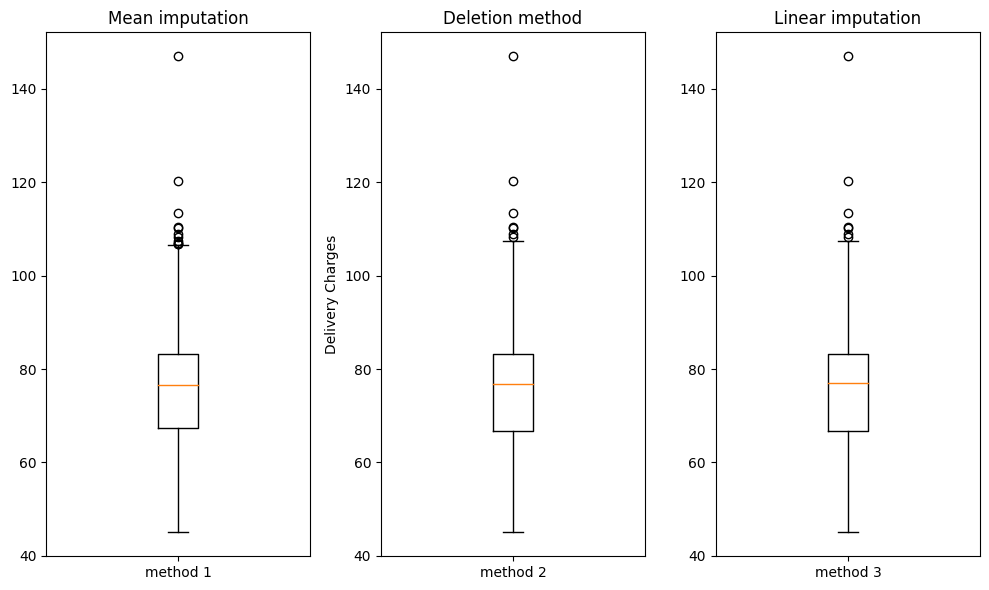

In [112]:
# Compare three methods
plt.figure(figsize=(10, 6))

# Boxplot for df_mis_mean
plt.subplot(1, 3, 1)
plt.boxplot(df_mis_mean['delivery_charges'])
plt.title('Mean imputation')
plt.xticks([1], ['method 1'])

# Boxplot for df_mis_drop
plt.subplot(1, 3, 2)
plt.boxplot(df_mis_drop['delivery_charges'])
plt.title('Deletion method')
plt.ylabel('Delivery Charges')
plt.xticks([1], ['method 2'])

# Boxplot for df_mis
plt.subplot(1, 3, 3)
plt.boxplot(df_mis['delivery_charges'])
plt.title('Linear imputation')
plt.xticks([1], ['method 3'])

plt.tight_layout()
plt.show()

This three methods get similar plots, however method 1 has more outliers which may not a good choice. For method 2 and 3, deletion method lost some data and it's not usually common used to deal with missing data. Method 3 is linear computation, which is the best choice.

In [113]:
# Save the result
df_mis.to_csv('/Original_data/Missing_data_solution.csv', index=False, encoding='utf-8')

# Part 3: Dealing with outliers

**Introduction:**

Finally, the third dataset, outlier_data.csv, includes outlier rows that could skew results if left unaddressed. Apply statistical techniques such as z-scores, IQR methods, and graphical analysis to identify and remove these anomalous data points, ensuring the dataset reflects realistic transaction patterns.

**Step 1**: Observe data by describle method and boxplot

**Step 2**: Choose 4 methods to remove outliers, including:
- The 3-sigma edit rule
- The Hampel Identifier
- Quartile-based Detection and Boxplots
- Linear Regression Model

**Step 3**: Compare 4 methods and find the best one by testing seasonal linear regression model's r-squared. (Found out **Linear Regression Model** is the best method)

**Step 4**: Draw the boxplot after removing outliers of choosing linear method.

In [114]:
# import outlier_data dataset
df_olr = pd.read_csv('/Original_data/Outlier_data.csv', encoding='utf-8')
# read first 5 rows
df_olr.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD365483,ID0282825815,2019-01-15,Thompson,"[('iStream', 1), ('iAssist Line', 1), ('Candle...",3235,78.49,-37.801176,144.951888,10,2989.99,Summer,False,1.3481,"great phone. works great, no complains",True
1,ORD369035,ID2810326445,2019-05-20,Nickolson,"[('Universe Note', 2), ('iStream', 2)]",7200,100.14,-37.806962,144.975641,10,6580.14,Autumn,True,1.4013,disappointed phone is not working what so ever...,False
2,ORD373347,ID0163643038,2019-11-18,Nickolson,"[('Toshika 750', 2), ('Candle Inferno', 2), ('...",13950,58.45,-37.820652,144.975330,25,10520.95,Spring,False,0.5574,data issues and flash issues. when your on a p...,False
3,ORD102579,ID0361771651,2019-02-22,Bakers,"[('Olivia x460', 2), ('Alcon 10', 2), ('iAssis...",22575,82.89,-37.799861,144.978689,25,17014.14,Summer,False,1.8411,amazing this cell phone can give a really good...,True
4,ORD427695,ID5668009781,2019-08-05,Bakers,"[('iAssist Line', 1), ('Toshika 750', 1)]",6545,63.58,-37.804428,145.001706,10,5954.08,Winter,False,0.8417,great phone value for money fast shipping,True


**Step 1**: Observe data by describle method and boxplot

In [115]:
df_olr.delivery_charges.describe() # The min value and the max value are far from the mean, may include outliers.

,delivery_charges
count,500.000000
mean,76.865120
std,18.007165
min,25.395000
25%,65.905000
50%,77.020000
75%,83.865000
max,154.650000


<Figure size 1000x600 with 0 Axes>

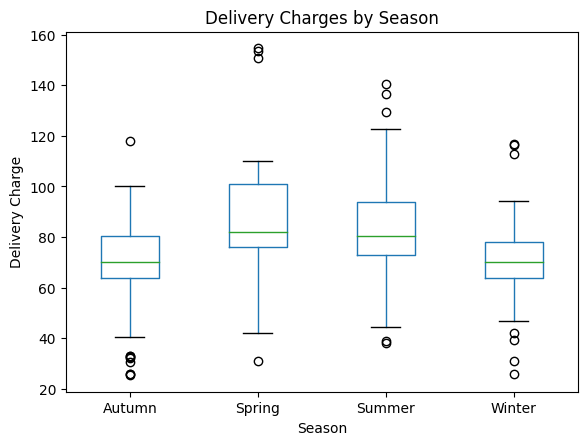

In [116]:
# Make a boxplot to show delivery charges by different seasons
plt.figure(figsize=(10, 6))
df_olr.boxplot(column='delivery_charges', by='season')
plt.title('Delivery Charges by Season')
plt.suptitle('')
plt.xlabel('Season')
plt.ylabel('Delivery Charge')
plt.grid(False)
plt.show()

The plot indicates delivery charges are higher in spring and lower in winter, some outliers can be observed.

**Step 2**: Choose 4 methods to remove outliers, including:
- The 3-sigma edit rule
- The Hampel Identifier
- Quartile-based Detection and Boxplots
- Linear Regression Model

## Method 1: The 3-sigma edit rule

In [117]:
def remove_outliers_3_sigma_rule(df):
    df2 = df.copy()
    # Group by season and calculate the mean and standard deviation
    df2['mean'] = df2.groupby('season')['delivery_charges'].transform('mean')
    df2['std'] = df2.groupby('season')['delivery_charges'].transform('std')

    # Define the 3σ boundaries for outlier detection
    df2['outliers'] = (abs(df2['delivery_charges'] - df2['mean']) > 3 * df2['std'])

    # Remove the outliers
    df_clean = df2[~df2['outliers']].copy()

    # Drop the extra columns
    df_clean.drop(columns=['mean', 'std', 'outliers'], inplace=True)

    return df_clean

In [118]:
df_3_sigma = remove_outliers_3_sigma_rule(df_olr)
df_3_sigma.delivery_charges.describe()

,delivery_charges
count,490.000000
mean,76.109459
std,16.138150
min,25.395000
25%,65.895000
50%,76.770000
75%,83.665000
max,129.255000


10 values are regearded as outliers and removed, the min value now is 25.39 and the max value is 129.26

## Method 2: The Hampel Identifier

In [119]:
def remove_outliers_hampel_identifier(df):
    df2 = df.copy()
    # Group by season and calculate the median and Median Absolute Deviation for each group
    df2['median'] = df2.groupby('season')['delivery_charges'].transform('median')
    df2['mad'] = df2.groupby('season')['delivery_charges'].transform(lambda x: 1.4826 * (abs(x - x.median())).median())

    # Define the Hampel filter outlier rule: |xk - median| > 3 * MAD
    df2['outliers'] = (abs(df2['delivery_charges'] - df2['median']) > 3 * df2['mad'])

    # Remove the outliers
    df_clean = df2[~df2['outliers']].copy()

    # Drop the extra columns
    df_clean.drop(columns=['median', 'mad', 'outliers'], inplace=True)

    return df_clean

In [120]:
df_hampel = remove_outliers_hampel_identifier(df_olr)
df_hampel.delivery_charges.describe()

,delivery_charges
count,485.000000
mean,76.224546
std,15.426066
min,30.805000
25%,65.930000
50%,76.800000
75%,83.590000
max,122.790000


15 values are regearded as outliers and removed, the min value now is 30.8 and the max value is 122.79

## Method 3: Quartile-based Detection and Boxplots

In [121]:
def remove_outliers_quartile_based(df):
    df2 = df.copy()
    # Group by season and calculate Q1, Q3, and IQR for each group
    df2['Q1'] = df2.groupby('season')['delivery_charges'].transform(lambda x: x.quantile(0.25))
    df2['Q3'] = df2.groupby('season')['delivery_charges'].transform(lambda x: x.quantile(0.75))
    df2['IQR'] = df2['Q3'] - df2['Q1']

    # Define the outlier detection rule for upper and lower bounds
    df2['lower_bound'] = df2['Q1'] - 1.5 * df2['IQR']
    df2['upper_bound'] = df2['Q3'] + 1.5 * df2['IQR']

    # Detect outliers
    df2['outliers'] = (df2['delivery_charges'] < df2['lower_bound']) | (df2['delivery_charges'] > df2['upper_bound'])

    # Remove the outliers
    df_quartile = df2[~df2['outliers']].copy()

    # Drop the extra columns
    df_quartile.drop(columns=['Q1', 'Q3', 'IQR', 'lower_bound', 'upper_bound', 'outliers'], inplace=True)

    return df_quartile

In [122]:
df_quartile = remove_outliers_quartile_based(df_olr)
df_quartile.delivery_charges.describe()

,delivery_charges
count,475.000000
mean,77.090200
std,14.361334
min,40.620000
25%,66.560000
50%,77.160000
75%,83.785000
max,122.790000


25 values are regearded as outliers and removed, the min value now is 40.62 and the max value is 122.79

## Method 4: Linear Regression Model

In [123]:
df2 = df_olr.copy()

# Define X (independent variables) and y (dependent variable)
X = df2[['distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'order_price', 'coupon_discount']]
y = df2['delivery_charges']

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the delivery charges
df2['predicted_charges'] = model.predict(X)

# Calculate the residuals (actual - predicted)
df2['residuals'] = df2['delivery_charges'] - df2['predicted_charges']

# Group by season, calculate mean and standard deviation for residuals within each group
df2['mean_residual'] = df2.groupby('season')['residuals'].transform('mean')
df2['std_residual'] = df2.groupby('season')['residuals'].transform('std')

# Detect outliers where residuals are greater than the threshold * standard deviation
df2['outliers'] = abs(df2['residuals'] - df2['mean_residual']) > 2 * df2['std_residual']

# Remove the outliers
df_regression = df2[~df2['outliers']].copy()

# Drop unnecessary columns
df_regression.drop(columns=['predicted_charges', 'residuals', 'mean_residual', 'std_residual', 'outliers'], inplace=True)

In [124]:
df_regression.delivery_charges.describe()

,delivery_charges
count,462.000000
mean,76.610097
std,13.848449
min,25.395000
25%,66.535000
50%,76.990000
75%,83.442500
max,110.170000


38 values are regearded as outliers and removed, the min value now is 25.4 and the max value is 110.17

**Step 3**: Compare 4 methods and find the best one by testing seasonal linear regression model's r-squared.

The result shows the best possible r-squared for each method

In [125]:
variables = ['distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'order_price', 'coupon_discount']

# List of datasets to process
df_all = {
    '3_sigma': df_3_sigma,
    'hampel': df_hampel,
    'quartile': df_quartile,
    'regression': df_regression
}

In [126]:
# Spring season model
best_results = []
# Loop over each dataset
for df_name, df in df_all.items():
    combinations = []
    result_spring = []

    # Generate all the possible combinations of the variables
    for i in range(1, len(variables) + 1):
        combinations.extend(itertools.combinations(variables, i))

    # Loop over each combination and get R-squared values
    for comb in combinations:
        r2 = build_linear_model(df, 'Spring', list(comb))[1]
        result_spring.append((comb, r2))

    # Sort the results by R-squared from high to low
    sorted_results = sorted(result_spring, key=lambda x: x[1], reverse=True)

    # Get the best combination (highest R-squared)
    best_combination, best_r2 = sorted_results[0]

    # Append the best result for this dataset to the list
    best_results.append((df_name, best_combination, best_r2))

# Sort the final best results across all datasets by R-squared
best_results_sorted = sorted(best_results, key=lambda x: x[2], reverse=True)

# Output the sorted best R-squared values across all datasets
for dataset_name, best_combination, best_r2 in best_results_sorted:
    print(f"Best R-squared for {dataset_name}: {best_r2:.3f}, Combination: {best_combination}")

Best R-squared for regression: 0.998, Combination: ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'order_price')
Best R-squared for quartile: 0.988, Combination: ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer')
Best R-squared for 3_sigma: 0.873, Combination: ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'coupon_discount')
Best R-squared for hampel: 0.873, Combination: ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'coupon_discount')


In [127]:
# Summer season model
best_results = []
# Loop over each dataset
for df_name, df in df_all.items():
    combinations = []
    result_summer = []

    # Generate all the possible combinations of the variables
    for i in range(1, len(variables) + 1):
        combinations.extend(itertools.combinations(variables, i))

    # Loop over each combination and get R-squared values
    for comb in combinations:
        r2 = build_linear_model(df, 'Summer', list(comb))[1]
        result_summer.append((comb, r2))

    # Sort the results by R-squared from high to low
    sorted_results = sorted(result_summer, key=lambda x: x[1], reverse=True)

    # Get the best combination (highest R-squared)
    best_combination, best_r2 = sorted_results[0]

    # Append the best result for this dataset to the list
    best_results.append((df_name, best_combination, best_r2))

# Sort the final best results across all datasets by R-squared
best_results_sorted = sorted(best_results, key=lambda x: x[2], reverse=True)

# Output the sorted best R-squared values across all datasets
for dataset_name, best_combination, best_r2 in best_results_sorted:
    print(f"Best R-squared for {dataset_name}: {best_r2:.3f}, Combination: {best_combination}")

Best R-squared for regression: 0.994, Combination: ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'coupon_discount')
Best R-squared for quartile: 0.657, Combination: ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer')
Best R-squared for 3_sigma: 0.371, Combination: ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer')
Best R-squared for hampel: 0.312, Combination: ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer')


In [128]:
# Autumn season model
best_results = []
# Loop over each dataset
for df_name, df in df_all.items():
    combinations = []
    result_autumn = []

    # Generate all the possible combinations of the variables
    for i in range(1, len(variables) + 1):
        combinations.extend(itertools.combinations(variables, i))

    # Loop over each combination and get R-squared values
    for comb in combinations:
        r2 = build_linear_model(df, 'Autumn', list(comb))[1]
        result_autumn.append((comb, r2))

    # Sort the results by R-squared from high to low
    sorted_results = sorted(result_autumn, key=lambda x: x[1], reverse=True)

    # Get the best combination (highest R-squared)
    best_combination, best_r2 = sorted_results[0]

    # Append the best result for this dataset to the list
    best_results.append((df_name, best_combination, best_r2))

# Sort the final best results across all datasets by R-squared
best_results_sorted = sorted(best_results, key=lambda x: x[2], reverse=True)

# Output the sorted best R-squared values across all datasets
for dataset_name, best_combination, best_r2 in best_results_sorted:
    print(f"Best R-squared for {dataset_name}: {best_r2:.3f}, Combination: {best_combination}")

Best R-squared for regression: 0.981, Combination: ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer')
Best R-squared for quartile: 0.729, Combination: ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer')
Best R-squared for hampel: 0.693, Combination: ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'order_price')
Best R-squared for 3_sigma: 0.523, Combination: ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'order_price', 'coupon_discount')


In [129]:
# Winter season model
best_results = []
# Loop over each dataset
for df_name, df in df_all.items():
    combinations = []
    result_winter = []

    # Generate all the possible combinations of the variables
    for i in range(1, len(variables) + 1):
        combinations.extend(itertools.combinations(variables, i))

    # Loop over each combination and get R-squared values
    for comb in combinations:
        r2 = build_linear_model(df, 'Winter', list(comb))[1]
        result_winter.append((comb, r2))

    # Sort the results by R-squared from high to low
    sorted_results = sorted(result_winter, key=lambda x: x[1], reverse=True)

    # Get the best combination (highest R-squared)
    best_combination, best_r2 = sorted_results[0]

    # Append the best result for this dataset to the list
    best_results.append((df_name, best_combination, best_r2))

# Sort the final best results across all datasets by R-squared
best_results_sorted = sorted(best_results, key=lambda x: x[2], reverse=True)

# Output the sorted best R-squared values across all datasets
for dataset_name, best_combination, best_r2 in best_results_sorted:
    print(f"Best R-squared for {dataset_name}: {best_r2:.3f}, Combination: {best_combination}")

Best R-squared for regression: 0.992, Combination: ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'order_price')
Best R-squared for quartile: 0.990, Combination: ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'coupon_discount')
Best R-squared for 3_sigma: 0.954, Combination: ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'coupon_discount')
Best R-squared for hampel: 0.954, Combination: ('distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'coupon_discount')


After comparing, the result indicates that linear regression is the best method to remove outliers, in all seasons have the highest digit of r-squared than other methods.

In [130]:
df_regression.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD365483,ID0282825815,2019-01-15,Thompson,"[('iStream', 1), ('iAssist Line', 1), ('Candle...",3235,78.49,-37.801176,144.951888,10,2989.99,Summer,False,1.3481,"great phone. works great, no complains",True
2,ORD373347,ID0163643038,2019-11-18,Nickolson,"[('Toshika 750', 2), ('Candle Inferno', 2), ('...",13950,58.45,-37.820652,144.975330,25,10520.95,Spring,False,0.5574,data issues and flash issues. when your on a p...,False
3,ORD102579,ID0361771651,2019-02-22,Bakers,"[('Olivia x460', 2), ('Alcon 10', 2), ('iAssis...",22575,82.89,-37.799861,144.978689,25,17014.14,Summer,False,1.8411,amazing this cell phone can give a really good...,True
4,ORD427695,ID5668009781,2019-08-05,Bakers,"[('iAssist Line', 1), ('Toshika 750', 1)]",6545,63.58,-37.804428,145.001706,10,5954.08,Winter,False,0.8417,great phone value for money fast shipping,True
5,ORD354816,ID4307007287,2019-06-11,Bakers,"[('Thunder line', 1), ('Candle Inferno', 2), (...",7490,74.06,-37.790818,144.985793,5,7189.56,Winter,False,2.2906,this is not the droid turbo 2 i like lucentrol...,True


**Step 4**: Draw the boxplot after removing outliers of choosing linear method.

<Figure size 1000x600 with 0 Axes>

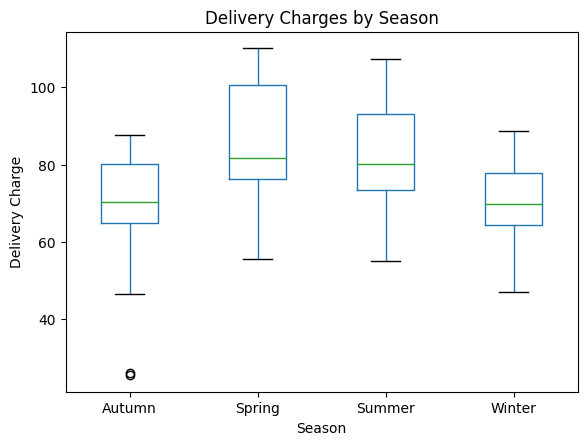

In [131]:
plt.figure(figsize=(10, 6))
df_regression.boxplot(column='delivery_charges', by='season')
plt.title('Delivery Charges by Season')
plt.suptitle('')
plt.xlabel('Season')
plt.ylabel('Delivery Charge')
plt.grid(False)
plt.show()

Draw the plot after removing outliers. Only can find one outlier in Autumn season, but it has a neglect impact which can be ignored.

In [132]:
# Save the result
df_regression.to_csv('/Original_data/Outlier_data_solution.csv', index=False, encoding='utf-8')